# Linear Regression on WeatherHistory Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Ingest

In [2]:
# reading the data
df = pd.read_csv("/content/weatherHistory.csv")

In [ ]:
df

In [ ]:
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49165 entries, 0 to 49164
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            49165 non-null  object 
 1   Summary                   49165 non-null  object 
 2   Precip Type               49165 non-null  object 
 3   Temperature (C)           49165 non-null  float64
 4   Apparent Temperature (C)  49165 non-null  float64
 5   Humidity                  49165 non-null  float64
 6   Wind Speed (km/h)         49165 non-null  float64
 7   Wind Bearing (degrees)    49165 non-null  float64
 8   Visibility (km)           49165 non-null  float64
 9   Loud Cover                49164 non-null  float64
 10  Pressure (millibars)      49164 non-null  float64
 11  Daily Summary             49164 non-null  object 
dtypes: float64(8), object(4)
memory usage: 4.5+ MB


## Exploratory Data Analysis (EDA)

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49165.000000,49164.0,49164.000000
mean,11.781547,10.676420,0.734463,10.905034,190.371240,9.866087,0.0,1003.016438
std,9.680495,10.851250,0.192902,7.008900,106.731197,3.824793,0.0,116.997888
min,-16.666667,-24.233333,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.350000,1.983333,0.610000,5.892600,120.000000,8.130500,0.0,1011.570000
50%,11.900000,11.900000,0.780000,9.998100,185.000000,9.982000,0.0,1016.250000
75%,18.833333,18.833333,0.890000,14.232400,290.000000,11.270000,0.0,1021.000000
max,39.905556,38.377778,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


In [7]:
df.isna().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  1
Pressure (millibars)        1
Daily Summary               1
dtype: int64

In [ ]:
df['Precip Type']

0        rain
1        rain
2        rain
3        rain
4        rain
         ... 
96448    rain
96449    rain
96450    rain
96451    rain
96452    rain
Name: Precip Type, Length: 96453, dtype: object

**`df.corr()`** is used to calculate the correlation between numerical columns in a DataFrame. This helps quantify the strength and direction of a linear relationship between two variables. It can help you understand how changes in one variable are associated with changes in another.
>for example, in terms of data exploration, it can help by generating a correlation matrix for all numerical columns in your dataset, from there you can quickly identify which variables are strongly related.

In [ ]:
df.corr()

<ipython-input-9-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Temperature (C),1.000000,0.992629,-0.632255,0.008957,0.029988,0.392847,NaN,-0.005447
Apparent Temperature (C),0.992629,1.000000,-0.602571,-0.056650,0.029031,0.381718,NaN,-0.000219
Humidity,-0.632255,-0.602571,1.000000,-0.224951,0.000735,-0.369173,NaN,0.005454
Wind Speed (km/h),0.008957,-0.056650,-0.224951,1.000000,0.103822,0.100749,NaN,-0.049263
Wind Bearing (degrees),0.029988,0.029031,0.000735,0.103822,1.000000,0.047594,NaN,-0.011651
Visibility (km),0.392847,0.381718,-0.369173,0.100749,0.047594,1.000000,NaN,0.059818
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),-0.005447,-0.000219,0.005454,-0.049263,-0.011651,0.059818,NaN,1.000000


**seaborn's heatmap** is especially used to create matrix plots. You'd have to have your data in some sort of **matrix form**
> **Matrix form:** Index name and column name match up so that the cell value indicates something relevant to both of those names

<ipython-input-10-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

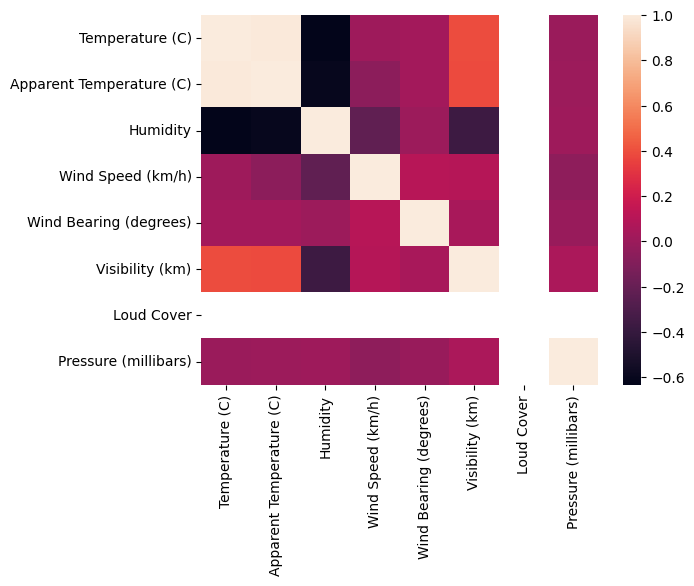

In [ ]:
sns.heatmap(df.corr())

**Seaborn's pairplot** is used in plotting grids. **Grids** automate subplots based off of features in your data

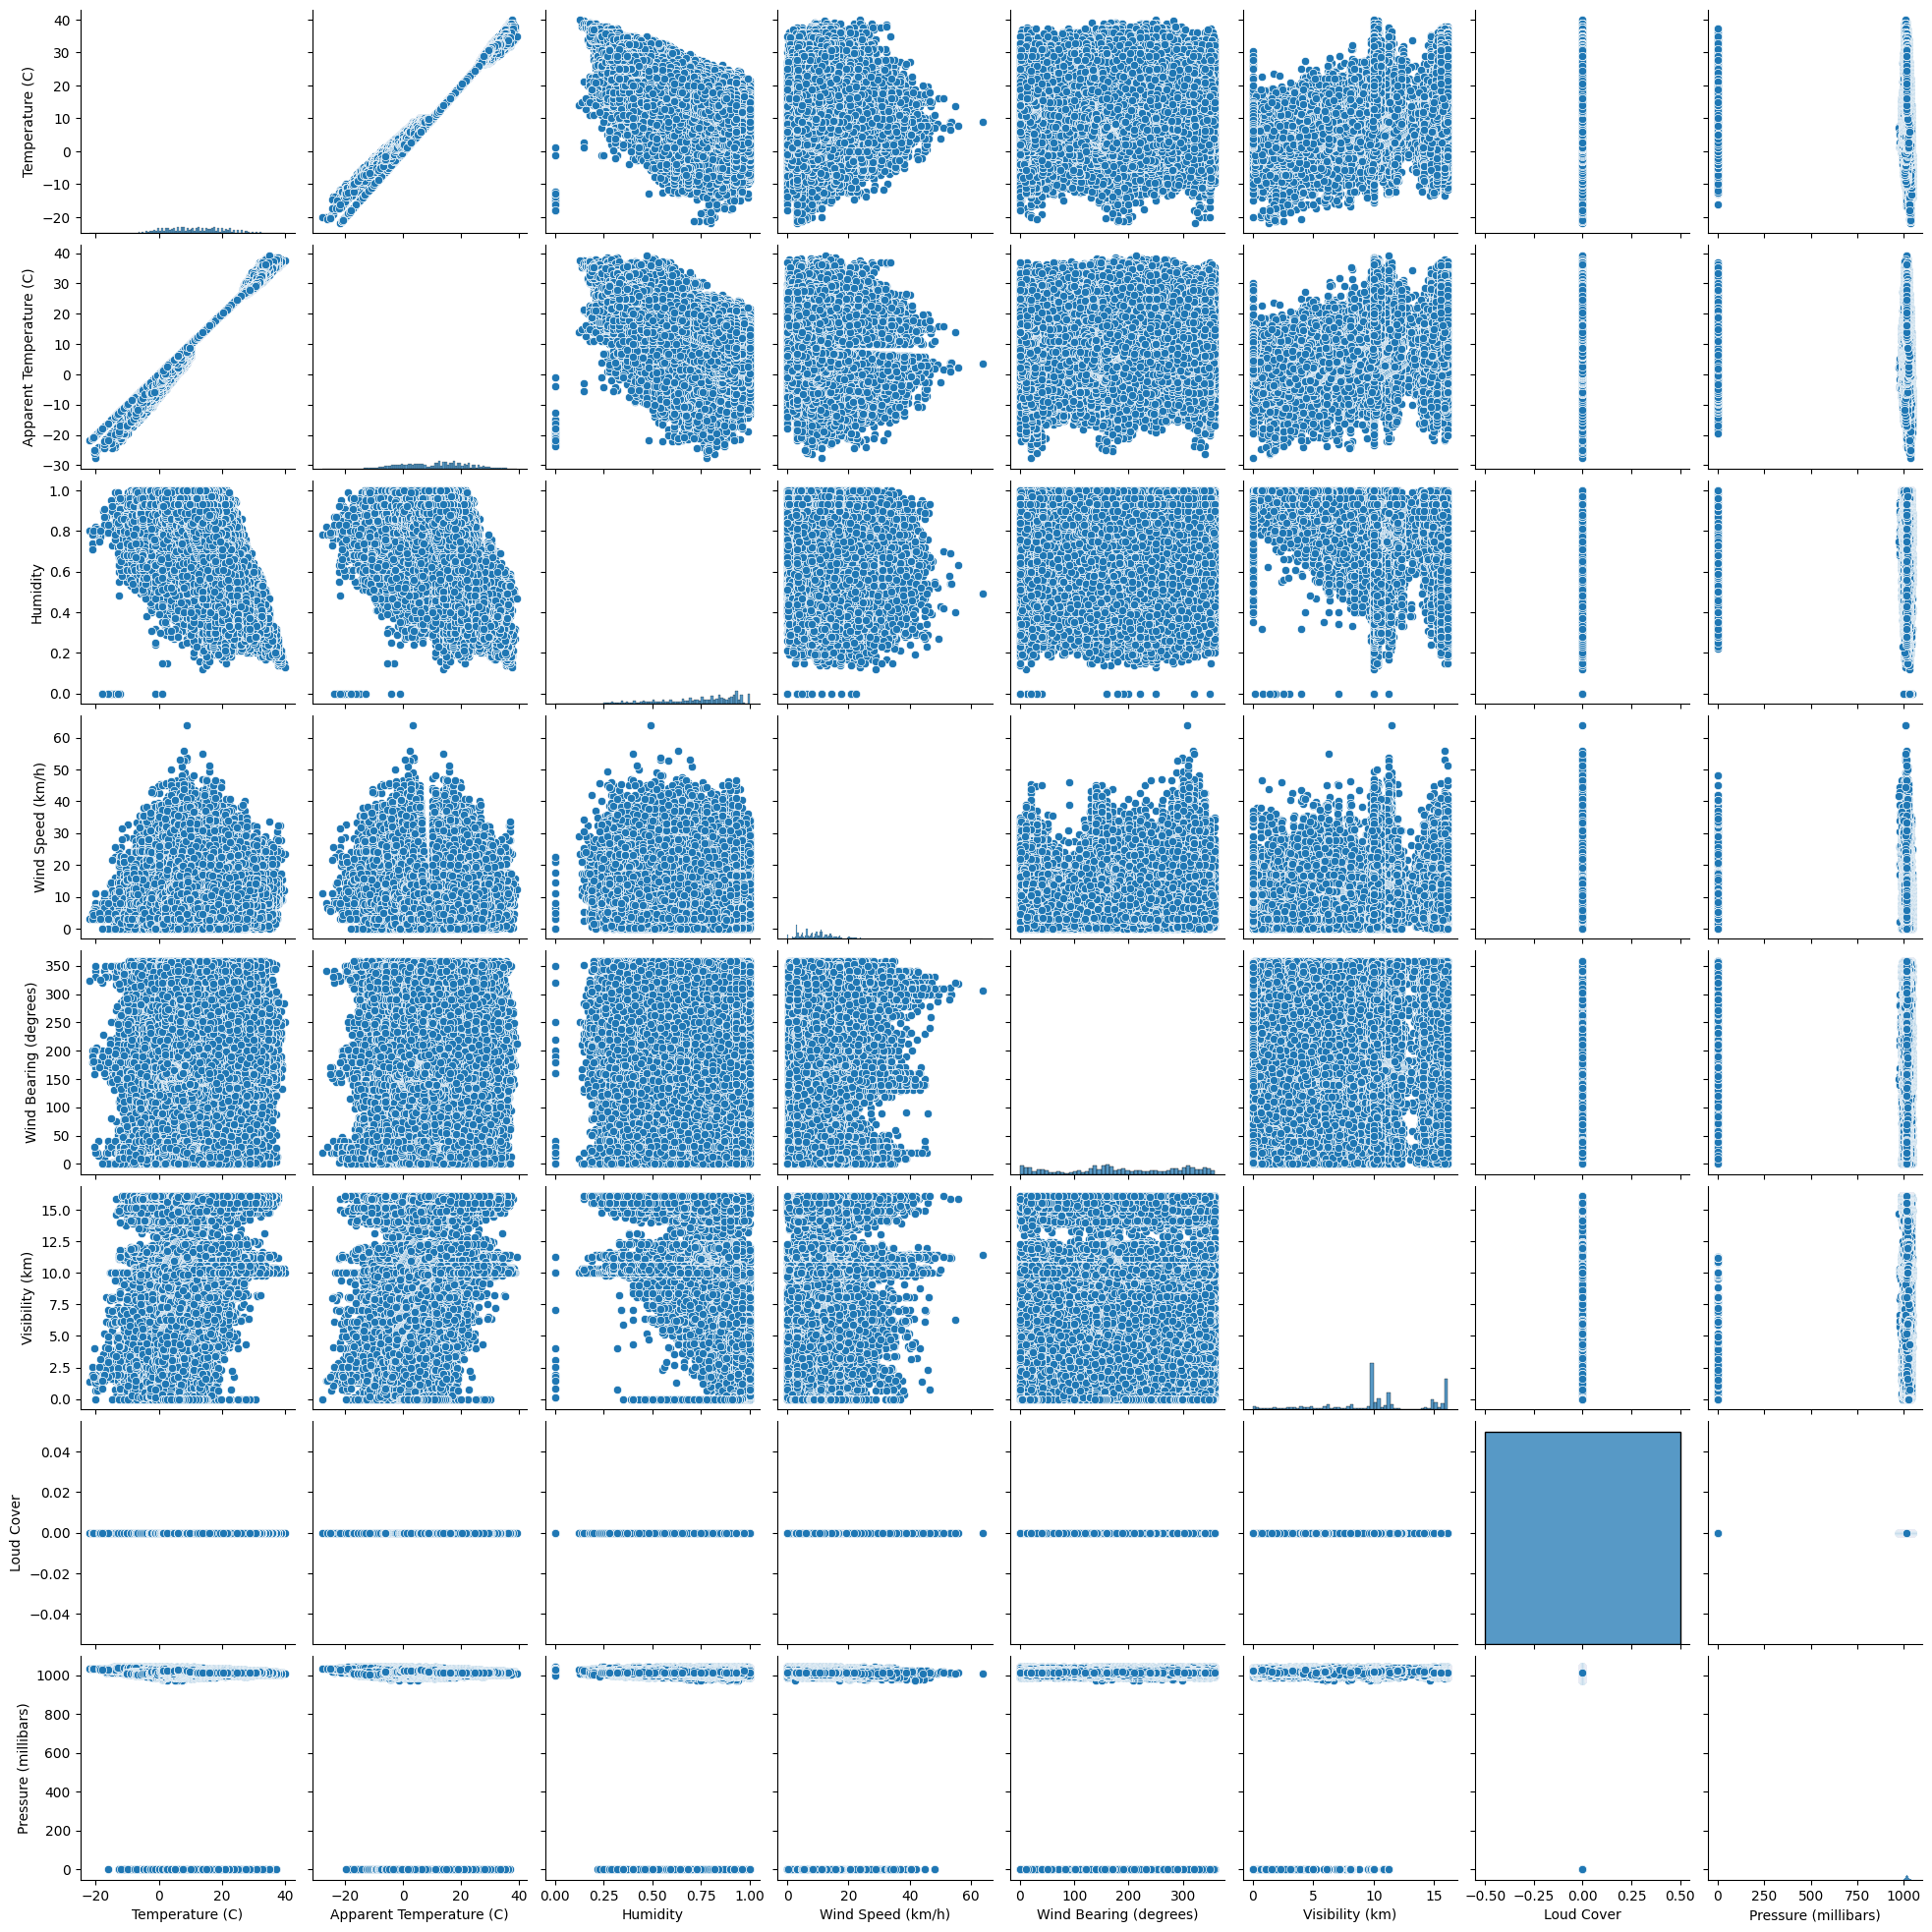

In [ ]:
sns.pairplot(df)

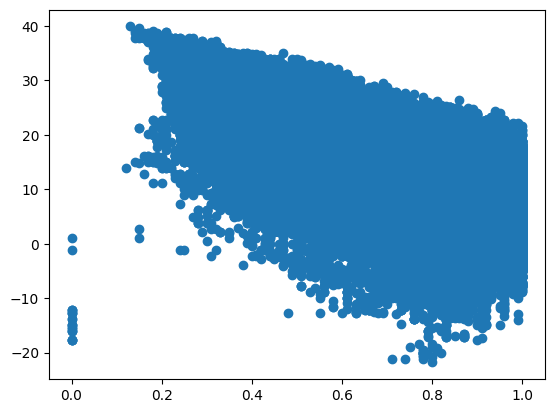

In [ ]:
plt.scatter(x="Humidity", y="Temperature (C)", data=df)

## MODELING


### Splitting the Data into Features and Labels

In [ ]:
# features and labels

# features - independent varibles
X = df[['Humidity', 'Temperature (C)']]
y = df['Apparent Temperature (C)']   #label/ target

In [ ]:
# splitting data
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
X_train

,Humidity,Temperature (C)
3341,0.83,-12.805556
69330,0.47,12.194444
90061,0.95,7.805556
33815,0.85,2.777778
92684,0.92,18.211111
...,...,...
71711,0.96,-0.533333
9704,0.57,23.427778
76726,0.96,1.127778
92105,0.84,19.272222


### Linear Regression model Training

In [ ]:
# import the LinearRegression model
from sklearn.linear_model import LinearRegression

In [ ]:
# Initializing the linear regression model
linear_model = LinearRegression()

In [ ]:
# Now we can train(fit) our model with the split data -- training data
linear_model.fit(X_train, y_train)

LinearRegression()

Now that the model has been fit on the training data.
The model is now **ready to predict labels or values** on the **test set**.

We use the **`predict()`** method  and pass in your **X_test** data (features) and get predictions off of that.

In [ ]:
prediction = linear_model.predict(X_test)

In [ ]:
prediction

array([ 9.78405542, -3.60777639, 18.06440249, ...,  4.71301984,
       12.63793802, 17.12324892])

In [ ]:
pred_df = pd.DataFrame(y_test)
pred_df["predicted"] = prediction

In [ ]:
pred_df

,Apparent Temperature (C),predicted
25586,10.683333,9.784055
38264,-1.111111,-3.607776
27700,17.777778,18.064402
59506,4.744444,6.300762
64261,-3.522222,-2.489457
...,...,...
91626,19.005556,19.144264
11411,-2.866667,-0.080698
90092,6.038889,4.713020
85467,13.666667,12.637938


## Evalution Metrics
We can now **evaluate** our model by comparing our predictions to the correct values